In [2]:
import numpy as np
import pandas as pd
import os
print(os.getcwd())

C:\Users\rusmch\Desktop\File\ALL\Python_script


# Алгоритмы кластеризации

# 1. DBSCAN

Плотностной алгоритм кластеризации.Разделяет области с высокой плотностью точек и низкой плотностью точек.

Требует задания двух параметров : ε-окрестности, k-минимальное количество точек в кластере, в качестве меры расстояния, как правило Евклидова метрика.

**Основные термины:** 

*Основная точка* — точка имеющая ≥ k соседей в ε окрестности.
*Граничная точка* — не основная точка, имеющая  хотя бы одну основную точку в ε окрестности.
*Шумовая точка* — ни основная, ни граничная.

**Алгоритм:**

Вход: обучающая выборка, параметры ε, k

1. Определить основные, граничные и шумовые   точки для параметров ε, k

2. Создать граф, в котором основные точки соединены, если они находятся на расстоянии <= ε

3. Найти связанные компоненты графа

4. Присвоить все граничные точки  к ближайшим связанным компонентам.


**Преимущества:**

* Сбособен обнаруживать выбросы
* Сложность выполнения в парадигме BigO: O(NlogN)
* Кластера произвольной формы
* Не требует количество кластеров

**Недостатки:**

* Граничные точки, могут принадлежать нескольким кластерам
* Плохо работает с данными с большой разницей в плотности, поскольку не удается выбрать приемлемую для всех кластеров комбинацию параметров.
* Выбор ε окрестности затруднителен (можно применять подходы схожие с подбором K в K-means)

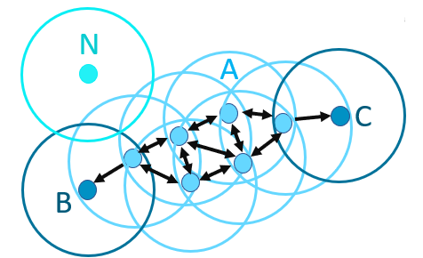

# Пример: Кластеризация магазинов по расстоянию

Вход: Матрица попарных расстояний между магазинами


In [3]:
df = pd.read_excel('Dist_NN.xlsx',index_col=0,sep=';',decimal=".",encoding='cp1251')
data_clust=df.iloc[:,:-2]

In [4]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=16,min_samples=5) 
dbscan.fit(data_clust) 
df['Кластер']=dbscan.labels_
df_cluster=df[['Долгота','Широта','Кластер']].sort_values(['Кластер'])
count = df['Кластер'].nunique()
print("Количество кластеров + Выбросы = ",count)

Количество кластеров + Выбросы =  8


In [5]:
import folium
df_map=df_cluster
m = folium.Map(location=[56.233349,43.834040])
for i in range(0,len(df_map)):
    Lon=df_map.iloc[i,0]
    Lat=df_map.iloc[i,1]
    if df_map.iloc[i,2]==0:
        folium.CircleMarker([Lat,Lon], radius = 5, fill_color='dodgerblue', color=False,fill_opacity = 0.9).add_to(m)
    elif df_map.iloc[i,2]==1:
        folium.CircleMarker([Lat,Lon], radius = 5, fill_color='lime', color=False,fill_opacity = 0.9).add_to(m)
    elif df_map.iloc[i,2]==2:
        folium.CircleMarker([Lat,Lon],radius = 5, fill_color='aqua',color=False,fill_opacity = 0.9).add_to(m)
    elif df_map.iloc[i,2]==3:
        folium.CircleMarker([Lat,Lon],radius = 5, fill_color="teal",color=False,fill_opacity = 0.9).add_to(m)
    elif df_map.iloc[i,2]==4:
        folium.CircleMarker([Lat,Lon],radius = 5, fill_color="grey",color=False, fill_opacity = 0.9).add_to(m)
    elif df_map.iloc[i,2]==5:
        folium.CircleMarker([Lat,Lon],radius = 5, fill_color="darkgreen",color=False, fill_opacity = 0.9).add_to(m)
    elif df_map.iloc[i,2]==6:
        folium.CircleMarker([Lat,Lon],radius = 5, fill_color="orange",color=False, fill_opacity = 0.9).add_to(m)
    elif df_map.iloc[i,2]==-1:
        folium.CircleMarker([Lat,Lon],radius = 5, fill_color="red",color=False, fill_opacity = 0.9).add_to(m)        
m

# 2. K-means кластеризация 

Наиболее популярный алгоритм кластеризации. 

Основная цель - минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров.

Требуемый параметр: количество кластеров K, в качестве меры расстояния-Евклидова метрика.

Как правило, для поиска оптимального количества кластеров применяют "метод локтя". При этом в качестве цели, может выступать максимизация дисперсии, минимизация искажения (внутрикластерного расстояния), минимизация коэффициента силуэта.

**Алгоритм**

Вход: матрица объектов с n признаками,количество кластеров K. Желательно выбирать центроиды, как наиболее удаленные друг от друга точки.

Повторять:

1. Отнести каждый объект к ближайшему центру
2. Вычислить новое положение центров (центр масс кластера).

Пока: 
объекты не перестанут изменяться между кластерами.


**Преимущества:**

* Сравнительно высокая эффективность при простоте реализации
* Высокое качество кластеризации
* Возможность распараллеливания
* Существование множества модификаций

**Недостатки:**

* Количество кластеров является параметром алгоритма
* Инициализация центров кластеров в значительной степени влияет на результат кластеризации.
* Чувствительность к выбросам и шумам
* Возможность сходимости к локальному оптимуму
* Итеративный подход не дает гарантии сходимости к оптимальному решению.
* Алгоритм неприменим к данным, для которых не определено понятие "среднего", например, категориальным данным.




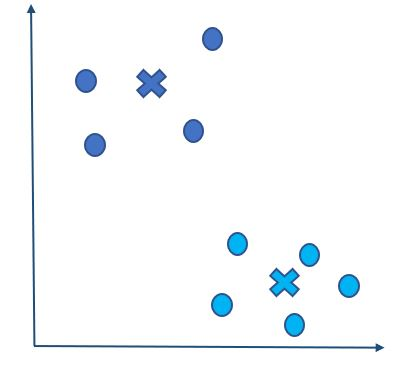

# Пример: Кластеризация магазинов по конкурентному окружению.

В качестве признаков использовался коэффициент силы влияния бренда конкурента. Данный коэффициент расчитывался по эвристической формуле, плюс экспертные веса для каждого бренда конкурента (считаем что разные бренды по разному влияют на наши магазины)
Необходимо получить 3 кластера:
-слабая конкуренция, -сильная конкуренция, -средняя конкуренция

Идея формулы расчета влияния бренда:


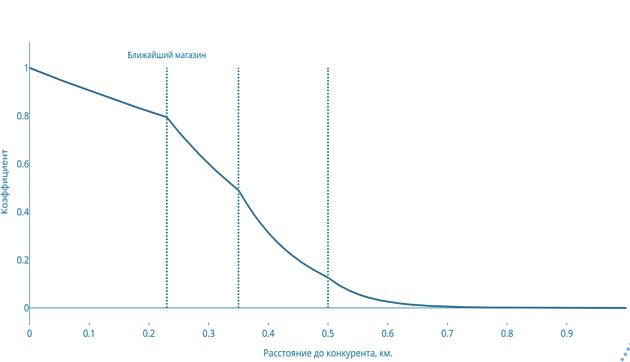

Вход: Матрица коэфициентов по силе бренда конкурентов

In [6]:
df = pd.read_excel('SPB_2.xlsx',index_col=0,sep=';',decimal=".",encoding='cp1251')

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.iloc[:,3:])
kmeans.labels_
df['cluster']=kmeans.labels_

In [10]:
import folium
df_map=df
m = folium.Map(location=[60.233349,43.834040])
for i in range(0,130):
    Lon=df_map.iloc[i,1]
    Lat=df_map.iloc[i,0]
    if df_map.iloc[i,9]==1:
        folium.CircleMarker([Lat,Lon], radius = 5, fill_color="darkblue", color=False, fill_opacity = 0.9).add_to(m)
    elif df_map.iloc[i,9]==0:
        folium.CircleMarker([Lat,Lon], radius = 5, fill_color="magenta",color=False,fill_opacity = 0.9).add_to(m)
    elif df_map.iloc[i,9]==2:
        folium.CircleMarker([Lat,Lon],radius = 5, fill_color="deepskyblue",color=False, fill_opacity = 0.9).add_to(m)   
m

In [106]:
df_1=(df.loc[df['cluster']==1])
df_2=(df.loc[df['cluster']==2])
df_3=(df.loc[df['cluster']==0])

In [112]:
def overlaid_histogram(data1, data2, data3, n_bins = 0, data1_name="", data1_color="#539caf", data2_name="", data2_color="#7663b0",data3_name="", data3_color="red", x_label="",y_label="", title=""):
    # Set the bounds for the bins so that the two distributions are fairly compared
    max_nbins = 10
    data_range = [min(min(data1), min(data2), min(data3)), max(max(data1), max(data2), max(data3))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
   

    if n_bins == 0:
        bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    else: 
        bins = n_bins

    # Create the plot
    _, ax = plt.subplots(figsize=(5,8))
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.hist(data3, bins = bins, color = data3_color, alpha = 0.75, label = data3_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

In [113]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

No handles with labels found to put in legend.


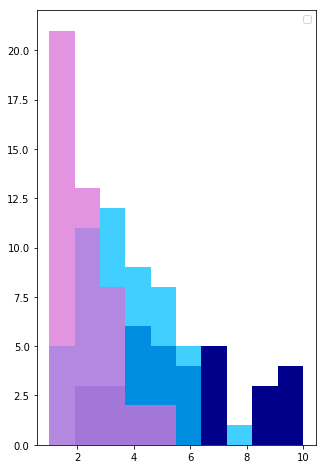

In [119]:
overlaid_histogram(df_1['Конкуренты'], df_2['Конкуренты'], df_3['Конкуренты'], n_bins = 0, data1_name="", data1_color="darkblue", data2_name="", data2_color="deepskyblue",data3_name="", data3_color="orchid", x_label="", y_label="", title="")